<a href="https://colab.research.google.com/github/MiguelAngeloTr/ALMACENAMIENTO_DATOS_ESPE/blob/main/EDA_SaludMental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =======================================
# EDA - Salud Mental
# =======================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Configuración de gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

** Cargar Datos**

In [ ]:

#PRIMER DATASET

df = pd.read_csv("Salud_Mental_20250829.csv")

import kagglehub

# Download latest version
path = kagglehub.dataset_download("imtkaggleteam/mental-health")

print("Path to dataset files:", path)





#SEGUNDO DATASET

import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/mental-health-dataset")

print("Path to dataset files:", path)
df2 = pd.read_csv("Mental_Health_Dataset.csv")




In [ ]:
# 3. Vista general
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())

Dimensiones del dataset: (142, 12)

Tipos de datos:
 diagnostico_ingreso    object
codigo_dx_ingreso      object
Menor a 1               int64
De 1 a 4                int64
De 5 a 9                int64
De 10 a 14              int64
De 15 a 19              int64
De 20 a 49              int64
De 50 a 64              int64
65 Y MAS                int64
Total                   int64
Año diagnóstico         int64
dtype: object

Valores nulos por columna:
 diagnostico_ingreso    0
codigo_dx_ingreso      0
Menor a 1              0
De 1 a 4               0
De 5 a 9               0
De 10 a 14             0
De 15 a 19             0
De 20 a 49             0
De 50 a 64             0
65 Y MAS               0
Total                  0
Año diagnóstico        0
dtype: int64


In [ ]:
# 4. Diagnósticos únicos
print("\nNúmero de diagnósticos distintos:", df["diagnostico_ingreso"].nunique())
print("Número de códigos CIE-10 distintos:", df["codigo_dx_ingreso"].nunique())


Número de diagnósticos distintos: 99
Número de códigos CIE-10 distintos: 102


/tmp/ipython-input-1202741194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Año diagnóstico", palette="pastel")


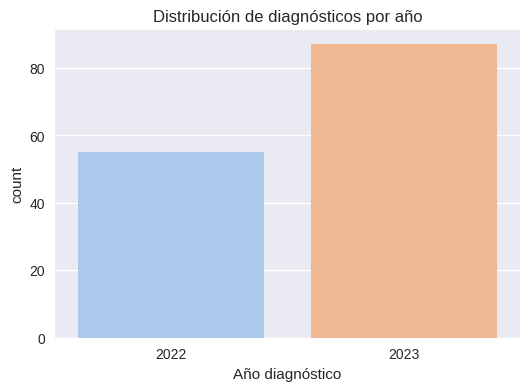

In [ ]:
# 5. Distribución de casos por año
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Año diagnóstico", palette="pastel")
plt.title("Distribución de diagnósticos por año")
plt.show()

/tmp/ipython-input-661102470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diag.values, y=top_diag.index, palette="coolwarm")


Text(0.5, 0, 'Número de casos')

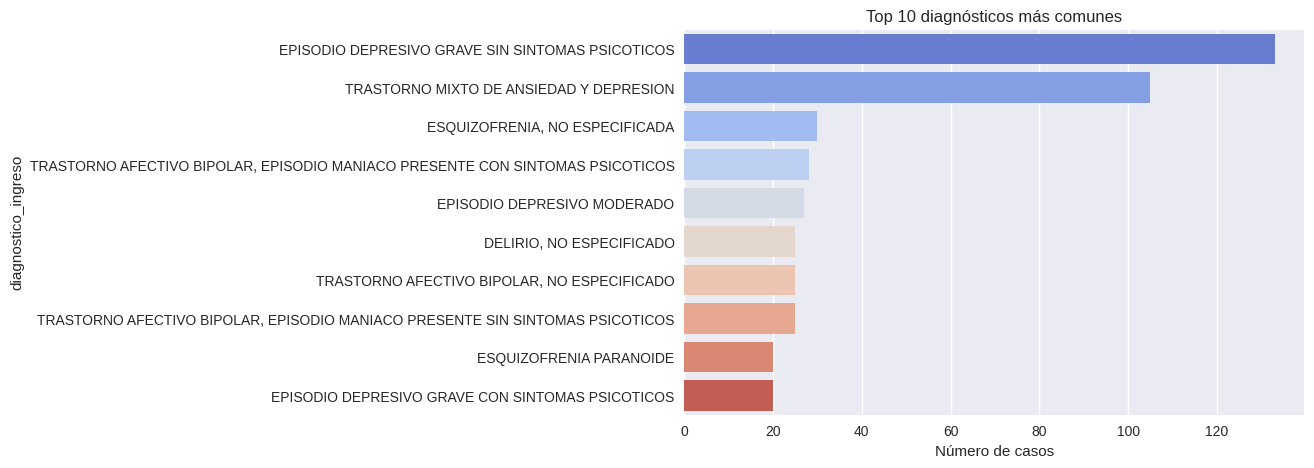

In [ ]:
# 6. Top 10 diagnósticos más comunes
top_diag = df.groupby("diagnostico_ingreso")["Total"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_diag.values, y=top_diag.index, palette="coolwarm")
plt.title("Top 10 diagnósticos más comunes")
plt.xlabel("Número de casos")

/tmp/ipython-input-3081233559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_edades.values, y=df_edades.index, palette="coolwarm")


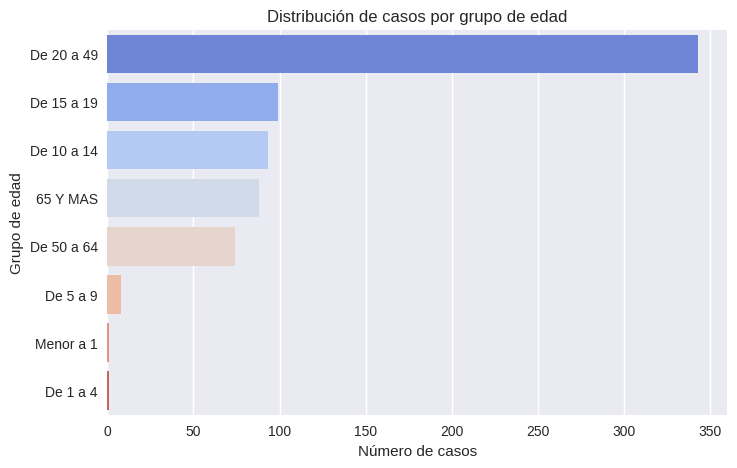

In [ ]:
# 7. Distribución por grupos de edad
edades = ["Menor a 1","De 1 a 4","De 5 a 9","De 10 a 14","De 15 a 19","De 20 a 49","De 50 a 64","65 Y MAS"]

df_edades = df[edades].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=df_edades.values, y=df_edades.index, palette="coolwarm")
plt.title("Distribución de casos por grupo de edad")
plt.xlabel("Número de casos")
plt.ylabel("Grupo de edad")
plt.show()

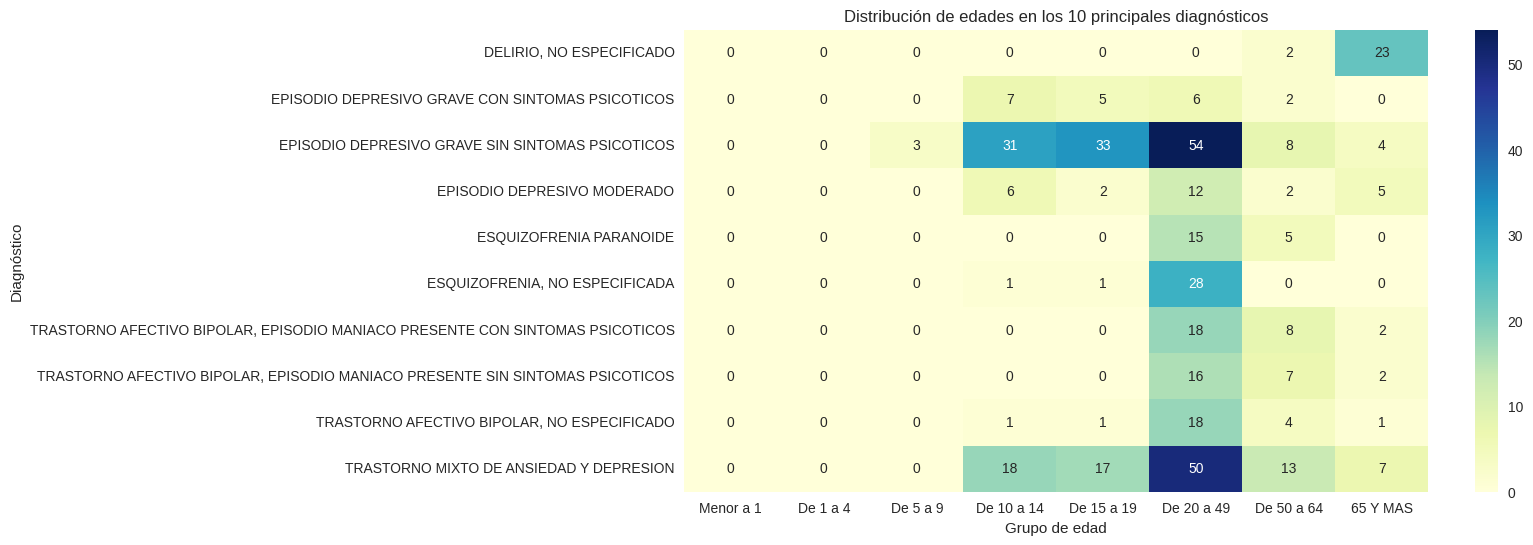

In [ ]:
# 8. Heatmap de diagnósticos vs edad (Top 10)
top10_names = top_diag.index
df_top10 = df[df["diagnostico_ingreso"].isin(top10_names)]

plt.figure(figsize=(12,6))
sns.heatmap(df_top10.groupby("diagnostico_ingreso")[edades].sum(),
            cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribución de edades en los 10 principales diagnósticos")
plt.ylabel("Diagnóstico")
plt.xlabel("Grupo de edad")
plt.show()